In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from library.sb_utils import save_file

In [51]:
stock_data = pd.read_csv('../data/stock_data_cleaned.csv')

In [52]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8326 entries, 0 to 8325
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8326 non-null   object 
 1   Open     8326 non-null   float64
 2   High     8326 non-null   float64
 3   Low      8326 non-null   float64
 4   Close    8326 non-null   float64
 5   Volume   8326 non-null   int64  
 6   OpenInt  8326 non-null   int64  
 7   Stock    8326 non-null   object 
 8   Change   8326 non-null   float64
 9   Loss     8326 non-null   float64
 10  Average  8326 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 715.6+ KB


In [53]:
print(stock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock',
       'Change', 'Loss', 'Average'],
      dtype='object')


In [54]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock,Change,Loss,Average
0,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL,0.00386,-0.00386,0.430920
1,1985-02-13,0.47512,0.47512,0.45335,0.45335,146978950,0,AAPL,-0.02177,0.02177,0.464235
2,1985-05-02,0.32911,0.32911,0.30733,0.30733,91968038,0,AAPL,-0.02178,0.02178,0.318220
3,1985-05-22,0.33041,0.33297,0.32911,0.32911,33621242,0,AAPL,-0.00130,0.00130,0.331040
4,1985-05-29,0.27279,0.27535,0.27279,0.27279,68760507,0,AAPL,0.00000,0.00000,0.274070


In [55]:
stock_data.describe()

,Open,High,Low,Close,Volume,OpenInt,Change,Loss,Average
count,8326.000000,8326.000000,8326.000000,8326.000000,8.326000e+03,8326.0,8326.000000,8326.000000,8326.000000
mean,70.131701,70.999764,69.183332,70.111678,8.335939e+07,0.0,-0.020024,0.020024,70.091548
std,73.173293,74.153474,72.048572,73.120513,9.702270e+07,0.0,1.952776,1.952776,73.096287
min,0.151000,0.159300,0.151000,0.159300,0.000000e+00,0.0,-20.510000,-20.760000,0.155150
25%,21.335000,21.677000,20.975750,21.302250,2.073961e+07,0.0,-0.361750,-0.363000,21.265875
50%,41.998500,42.547500,41.589000,41.947000,5.346558e+07,0.0,0.003305,-0.003305,41.949000
75%,95.439500,96.590250,94.557000,95.422500,1.109176e+08,0.0,0.363000,0.361750,95.544750
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0,20.760000,20.510000,383.645000


In [56]:
stock_data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
Change     0
Loss       0
Average    0
dtype: int64

In [57]:
stock_data.select_dtypes(include='number').mean()

Open       7.013170e+01
High       7.099976e+01
Low        6.918333e+01
Close      7.011168e+01
Volume     8.335939e+07
OpenInt    0.000000e+00
Change    -2.002351e-02
Loss       2.002351e-02
Average    7.009155e+01
dtype: float64

In [58]:
stock_data.select_dtypes(include='number').std()

Open       7.317329e+01
High       7.415347e+01
Low        7.204857e+01
Close      7.312051e+01
Volume     9.702270e+07
OpenInt    0.000000e+00
Change     1.952776e+00
Loss       1.952776e+00
Average    7.309629e+01
dtype: float64

In [59]:
#Finding the average stock price by stock
avg_price_per_stock = stock_data.groupby('Stock')['Average'].mean()
print(avg_price_per_stock)

Stock
AAPL     48.034595
META     85.077455
MSFT     32.463285
TSLA    168.265932
Name: Average, dtype: float64


Calculate the PCA

In [60]:
col = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Loss', 'Average']
avg_col = stock_data.groupby('Stock')[col].mean()

In [61]:
pca = avg_col.values
stock_pca = PCA().fit(pca)

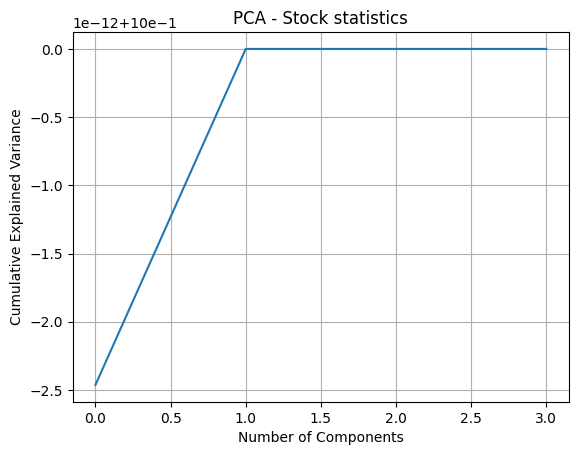

In [62]:
# Plot explained variance

plt.plot(stock_pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Stock statistics")
plt.grid()
plt.show()

In [63]:
variance = stock_pca.explained_variance_ratio_
for i, var in enumerate(variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}% of total variance)")

PC1: 1.0000 (100.00% of total variance)
PC2: 0.0000 (0.00% of total variance)
PC3: 0.0000 (0.00% of total variance)
PC4: 0.0000 (0.00% of total variance)


PC1: 1.0000 (100.00% of total variance): This means that all the variability in the data is captured by the first component alone. The is one-dimensional. 

PC2,PC3, PC4, have 0.00% of total variance which means it adds no new information beyond what PC already captures. 




In [64]:
open_price = stock_data.pivot(index = 'Stock', columns = 'Date', values = 'Open')
open_price.head()

Date,1984-09-11,1985-02-13,1985-05-02,1985-05-22,1985-05-29,1985-06-10,1985-10-11,1985-11-01,1985-11-26,1985-12-11,...,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10
Stock,,,,,,,,,,,,,,,,,,,,,
AAPL,0.42516,0.47512,0.32911,0.33041,0.27279,0.26126,0.2561,0.29712,0.30475,0.3112,...,163.30,167.30,169.26,167.04,173.38,171.75,173.29,174.03,174.48,175.11
META,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,179.26,180.57,182.36,180.63,179.29,178.56,180.50,179.79,178.31,178.35
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.80,84.36,83.68,83.35,84.08,84.20,84.77,84.14,84.11,83.79
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,319.18,320.23,332.25,300.13,299.50,NaN,301.02,305.50,NaN,NaN


In [65]:
close_price = stock_data.pivot(index = 'Stock', columns = 'Date', values = 'Close')
close_price.head()

Date,1984-09-11,1985-02-13,1985-05-02,1985-05-22,1985-05-29,1985-06-10,1985-10-11,1985-11-01,1985-11-26,1985-12-11,...,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10
Stock,,,,,,,,,,,,,,,,,,,,,
AAPL,0.42902,0.45335,0.30733,0.32911,0.27279,0.25742,0.2561,0.29712,0.3099,0.31507,...,166.12,168.43,166.29,167.51,171.88,173.63,174.18,175.61,175.25,174.67
META,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,179.87,180.06,182.66,178.92,178.92,180.17,180.25,179.56,179.30,178.46
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.89,83.18,83.18,84.05,84.14,84.47,84.26,84.56,84.09,83.87
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,320.08,331.53,321.08,299.26,306.09,NaN,306.05,304.31,NaN,NaN


In [66]:
diff = close_price - open_price
diff.head()

Date,1984-09-11,1985-02-13,1985-05-02,1985-05-22,1985-05-29,1985-06-10,1985-10-11,1985-11-01,1985-11-26,1985-12-11,...,2017-10-30,2017-10-31,2017-11-01,2017-11-02,2017-11-03,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10
Stock,,,,,,,,,,,,,,,,,,,,,
AAPL,0.00386,-0.02177,-0.02178,-0.0013,0.0,-0.00384,0.0,0.0,0.00515,0.00387,...,2.82,1.13,-2.97,0.47,-1.50,1.88,0.89,1.58,0.77,-0.44
META,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.61,-0.51,0.30,-1.71,-0.37,1.61,-0.25,-0.23,0.99,0.11
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09,-1.18,-0.50,0.70,0.06,0.27,-0.51,0.42,-0.02,0.08
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.90,11.30,-11.17,-0.87,6.59,NaN,5.03,-1.19,NaN,NaN


In [67]:
print(stock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock',
       'Change', 'Loss', 'Average'],
      dtype='object')


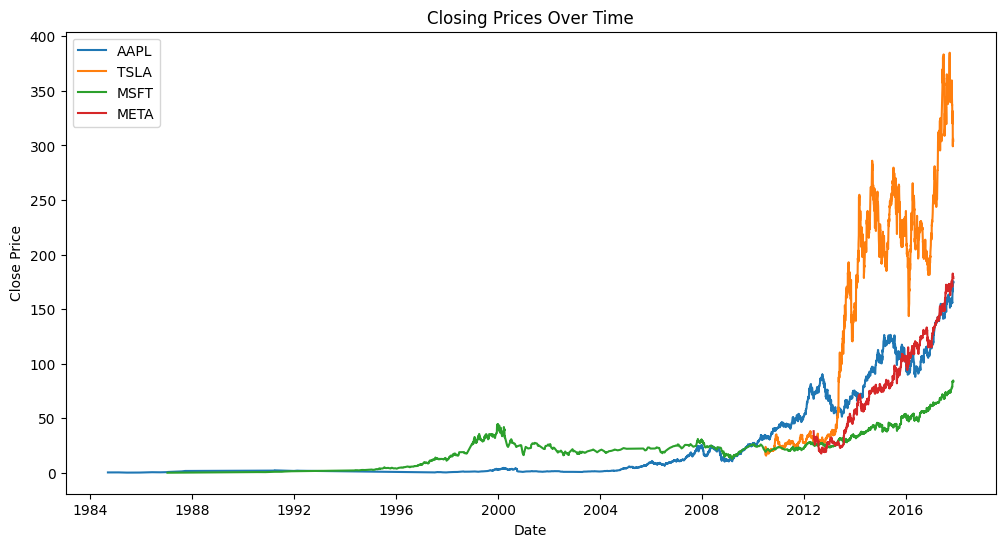

In [68]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Line plot for closing prices of each stock
plt.figure(figsize=(12, 6))
for stock in stock_data['Stock'].unique():
    subset = stock_data[stock_data['Stock'] == stock]
    plt.plot(subset.index, subset['Close'], label=stock)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [69]:
stock_data = stock_data.reset_index()

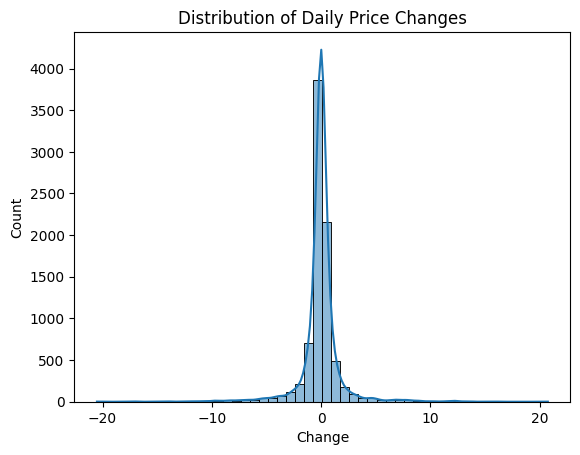

In [70]:
sns.histplot(stock_data['Change'], bins=50, kde=True)
plt.title("Distribution of Daily Price Changes")
plt.show()

Stock      AAPL      META      MSFT      TSLA
Stock                                        
AAPL   1.000000  0.998362  0.999048  0.995033
META   0.998362  1.000000  0.999096  0.998545
MSFT   0.999048  0.999096  1.000000  0.989999
TSLA   0.995033  0.998545  0.989999  1.000000


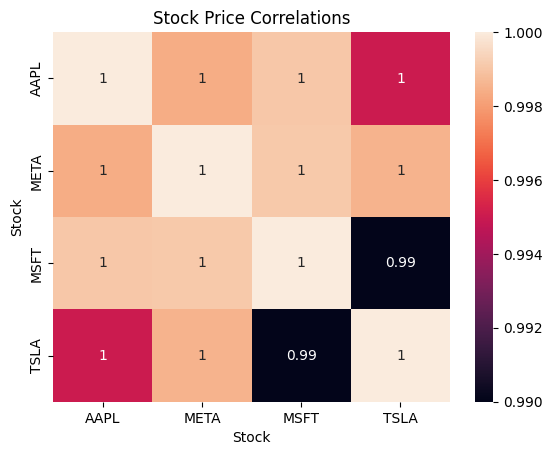

In [71]:
pivoted = stock_data.pivot(index='Open', columns='Stock', values='Close')
corr = pivoted.corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.title("Stock Price Correlations")
plt.show()

The analysis indicates that there is a positive correlation between the stock prices

In [72]:
stock_data.select_dtypes(include='number').corr()

,Open,High,Low,Close,Volume,OpenInt,Change,Loss,Average
Open,1.000000,0.999836,0.999800,0.999644,-0.429968,NaN,-0.040362,0.040362,0.999883
High,0.999836,1.000000,0.999741,0.999835,-0.429337,NaN,-0.027050,0.027050,0.999937
Low,0.999800,0.999741,1.000000,0.999837,-0.431370,NaN,-0.025636,0.025636,0.999933
Close,0.999644,0.999835,0.999837,1.000000,-0.430427,NaN,-0.013685,0.013685,0.999901
Volume,-0.429968,-0.429337,-0.431370,-0.430427,1.000000,NaN,-0.005558,0.005558,-0.430367
OpenInt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Change,-0.040362,-0.027050,-0.025636,-0.013685,-0.005558,NaN,1.000000,-1.000000,-0.026355
Loss,0.040362,0.027050,0.025636,0.013685,0.005558,NaN,-1.000000,1.000000,0.026355
Average,0.999883,0.999937,0.999933,0.999901,-0.430367,NaN,-0.026355,0.026355,1.000000


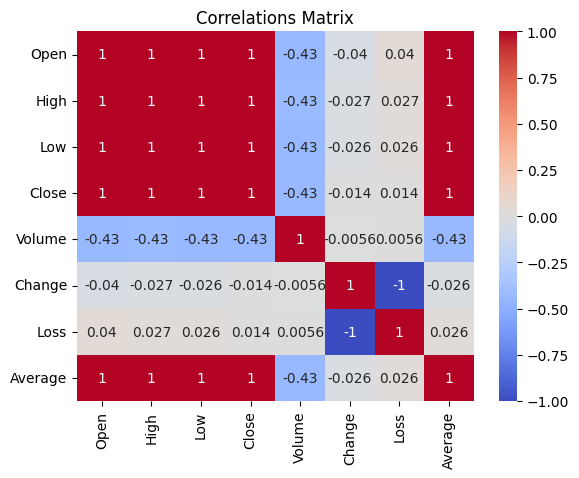

In [73]:

columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Loss', 'Average']
sns.heatmap(stock_data[columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlations Matrix")
plt.show()

A value of 1 indcates perfect positive correlation.

A value of 0 indcates no correlation. 

A value of -1 indcates perfect negative correlation.

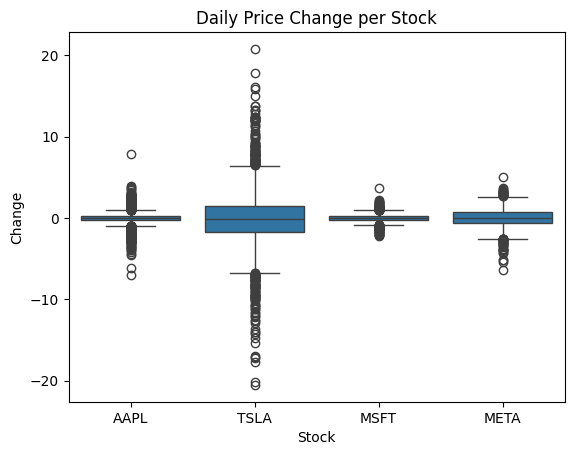

In [74]:
stock_data['Change'] = stock_data['Close'] - stock_data['Open']
sns.boxplot(data=stock_data, x='Stock', y='Change')
plt.title('Daily Price Change per Stock')
plt.show()

In [75]:
stock_data["Change"] = stock_data["Close"] - stock_data["Open"]
df_interest = stock_data[["Stock", "Date", "Open", "Close", "Change", "Loss", "Volume"]]
df_interest["Date"] = pd.to_datetime(df_interest["Date"])
df_interest.head()

/var/folders/b3/p6_4jqm15mdd_rc2hs1f6lm00000gn/T/ipykernel_28102/4288356215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest["Date"] = pd.to_datetime(df_interest["Date"])


,Stock,Date,Open,Close,Change,Loss,Volume
0,AAPL,1984-09-11,0.42516,0.42902,0.00386,-0.00386,42498199
1,AAPL,1985-02-13,0.47512,0.45335,-0.02177,0.02177,146978950
2,AAPL,1985-05-02,0.32911,0.30733,-0.02178,0.02178,91968038
3,AAPL,1985-05-22,0.33041,0.32911,-0.00130,0.00130,33621242
4,AAPL,1985-05-29,0.27279,0.27279,0.00000,0.00000,68760507


Return calculation 

In [76]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
stock_data = stock_data.sort_values(by=["Stock", "Date"])

In [77]:
# Creating the Daily Return
#  measures how much a stock's price changes from one day to the next
stock_data["Daily Return"] = stock_data.groupby("Stock")["Close"].pct_change()

In [78]:
# shows the total return over time
stock_data["Cumulative Return"] = stock_data.groupby("Stock")["Daily Return"].transform(lambda x: (1 + x).cumprod())

In [79]:
avg_return = stock_data.groupby("Stock")["Daily Return"].mean()
avg_return

Stock
AAPL    0.002643
META    0.001593
MSFT    0.004411
TSLA    0.002681
Name: Daily Return, dtype: float64

In [80]:
print(stock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock',
       'Change', 'Loss', 'Average', 'Daily Return', 'Cumulative Return'],
      dtype='object')


In [81]:
stock_data.describe()

,Date,Open,High,Low,Close,Volume,OpenInt,Change,Loss,Average,Daily Return,Cumulative Return
count,8326,8326.000000,8326.000000,8326.000000,8326.000000,8.326000e+03,8326.0,8326.000000,8326.000000,8326.000000,8322.000000,8322.000000
mean,2011-04-08 01:30:58.371366912,70.131701,70.999764,69.183332,70.111678,8.335939e+07,0.0,-0.020024,0.020024,70.091548,0.002977,103.315964
min,1984-09-11 00:00:00,0.151000,0.159300,0.151000,0.159300,0.000000e+00,0.0,-20.510000,-20.760000,0.155150,-0.680115,0.463772
25%,2008-08-14 06:00:00,21.335000,21.677000,20.975750,21.302250,2.073961e+07,0.0,-0.361750,-0.363000,21.265875,-0.010123,7.557165
50%,2013-03-11 00:00:00,41.998500,42.547500,41.589000,41.947000,5.346558e+07,0.0,0.003305,-0.003305,41.949000,0.001164,47.193346
75%,2015-07-07 18:00:00,95.439500,96.590250,94.557000,95.422500,1.109176e+08,0.0,0.363000,0.361750,95.544750,0.014117,176.660389
max,2017-11-10 00:00:00,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0,20.760000,20.510000,383.645000,4.106089,530.822348
std,NaN,73.173293,74.153474,72.048572,73.120513,9.702270e+07,0.0,1.952776,1.952776,73.096287,0.057705,116.276822


In [82]:
stock_data.head().T

,0,1,2,3,4
Date,1984-09-11 00:00:00,1985-02-13 00:00:00,1985-05-02 00:00:00,1985-05-22 00:00:00,1985-05-29 00:00:00
Open,0.42516,0.47512,0.32911,0.33041,0.27279
High,0.43668,0.47512,0.32911,0.33297,0.27535
Low,0.42516,0.45335,0.30733,0.32911,0.27279
Close,0.42902,0.45335,0.30733,0.32911,0.27279
Volume,42498199,146978950,91968038,33621242,68760507
OpenInt,0,0,0,0,0
Stock,AAPL,AAPL,AAPL,AAPL,AAPL
Change,0.00386,-0.02177,-0.02178,-0.0013,0.0
Loss,-0.00386,0.02177,0.02178,0.0013,0.0


In [83]:
stock_data['Daily Return'] = stock_data['Daily Return'].fillna(stock_data['Daily Return'].median())
stock_data['Cumulative Return'] = stock_data['Cumulative Return'].fillna(stock_data['Cumulative Return'].median())

In [98]:
stock_data["Tomorrow"] = stock_data['Close'].shift(-1)

In [99]:
stock_data['Target'] = (stock_data["Tomorrow"] > stock_data['Close']).astype(int)

In [102]:
stock_data['Daily Return'] = stock_data['Daily Return'].fillna(stock_data['Daily Return'].median())
stock_data['Cumulative Return'] = stock_data['Cumulative Return'].fillna(stock_data['Cumulative Return'].median())
stock_data["Tomorrow"] = stock_data["Tomorrow"].fillna(stock_data["Tomorrow"].median())

In [103]:
print(pd.DataFrame(stock_data).isna().sum())

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
OpenInt              0
Stock                0
Change               0
Loss                 0
Average              0
Daily Return         0
Cumulative Return    0
Tomorrow             0
Target               0
dtype: int64


In [104]:
stock_data

,Date,Open,High,Low,Close,Volume,OpenInt,Stock,Change,Loss,Average,Daily Return,Cumulative Return,Tomorrow,Target
0,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL,0.00386,-0.00386,0.430920,0.001164,47.193346,0.45335,1
1,1985-02-13,0.47512,0.47512,0.45335,0.45335,146978950,0,AAPL,-0.02177,0.02177,0.464235,0.056711,1.056711,0.30733,0
2,1985-05-02,0.32911,0.32911,0.30733,0.30733,91968038,0,AAPL,-0.02178,0.02178,0.318220,-0.322091,0.716354,0.32911,1
3,1985-05-22,0.33041,0.33297,0.32911,0.32911,33621242,0,AAPL,-0.00130,0.00130,0.331040,0.070868,0.767120,0.27279,0
4,1985-05-29,0.27279,0.27535,0.27279,0.27279,68760507,0,AAPL,0.00000,0.00000,0.274070,-0.171128,0.635844,0.25742,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,2017-11-01,332.25000,332.60900,320.26000,321.08000,8457336,0,TSLA,-11.17000,11.17000,326.434500,-0.031521,18.887059,299.26000,0
4872,2017-11-02,300.13000,308.69000,292.63000,299.26000,19791416,0,TSLA,-0.87000,0.87000,300.660000,-0.067958,17.603529,306.09000,1
4873,2017-11-03,299.50000,306.25000,295.13000,306.09000,8893974,0,TSLA,6.59000,-6.59000,300.690000,0.022823,18.005294,306.05000,0
4874,2017-11-07,301.02000,306.50000,300.03000,306.05000,5286320,0,TSLA,5.03000,-5.03000,303.265000,-0.000131,18.002941,304.31000,0


In [85]:
import requests

api_key = 'e3e5619abe624e18beb76b4dfcc7c827'
symbols = 'AAPL,META,MSFT,TSLA' 
url = f'https://api.twelvedata.com/quote?symbol={symbols}&apikey={api_key}'

response = requests.get(url)
data = response.json()

print(data)

{'AAPL': {'symbol': 'AAPL', 'name': 'Apple Inc.', 'exchange': 'NASDAQ', 'mic_code': 'XNGS', 'currency': 'USD', 'datetime': '2025-07-02', 'timestamp': 1751463000, 'last_quote_at': 1751463000, 'open': '209.080002', 'high': '213.34000', 'low': '208.14000', 'close': '212.44000', 'volume': '67834447', 'previous_close': '207.82001', 'change': '4.62000', 'percent_change': '2.22308', 'average_volume': '65413605', 'is_market_open': False, 'fifty_two_week': {'low': '169.21001', 'high': '260.10001', 'low_change': '43.23000', 'high_change': '-47.66000', 'low_change_percent': '25.54813', 'high_change_percent': '-18.32372', 'range': '169.210007 - 260.100006'}}, 'META': {'symbol': 'META', 'name': 'Meta Platforms, Inc. Class A', 'exchange': 'NASDAQ', 'mic_code': 'XNGS', 'currency': 'USD', 'datetime': '2025-07-02', 'timestamp': 1751463000, 'last_quote_at': 1751463000, 'open': '715.32501', 'high': '720.29999', 'low': '712.79999', 'close': '713.57001', 'volume': '9154005', 'previous_close': '719.21997', 

In [86]:
api_data = pd.DataFrame(data).T
api_data

,symbol,name,exchange,mic_code,currency,datetime,timestamp,last_quote_at,open,high,low,close,volume,previous_close,change,percent_change,average_volume,is_market_open,fifty_two_week
AAPL,AAPL,Apple Inc.,NASDAQ,XNGS,USD,2025-07-02,1751463000,1751463000,209.080002,213.34000,208.14000,212.44000,67834447,207.82001,4.62000,2.22308,65413605,False,"{'low': '169.21001', 'high': '260.10001', 'low..."
META,META,"Meta Platforms, Inc. Class A",NASDAQ,XNGS,USD,2025-07-02,1751463000,1751463000,715.32501,720.29999,712.79999,713.57001,9154005,719.21997,-5.64996,-0.78556820,13755840,False,"{'low': '442.64999', 'high': '747.90002', 'low..."
MSFT,MSFT,Microsoft Corp.,NASDAQ,XNGS,USD,2025-07-02,1751463000,1751463000,489.98999,493.5,488.70001,491.089996,16208543,492.049988,-0.95999146,-0.19510039,24040844,False,"{'low': '344.79001', 'high': '500.76001', 'low..."
TSLA,TSLA,Tesla Inc.,NASDAQ,XNGS,USD,2025-07-02,1751463000,1751463000,312.57501,316.83200,303.82001,315.64999,118838749,300.70999,14.94000,4.96824,113925125,False,"{'low': '182', 'high': '488.54001', 'low_chang..."


In [87]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, AAPL to TSLA
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   symbol          4 non-null      object
 1   name            4 non-null      object
 2   exchange        4 non-null      object
 3   mic_code        4 non-null      object
 4   currency        4 non-null      object
 5   datetime        4 non-null      object
 6   timestamp       4 non-null      object
 7   last_quote_at   4 non-null      object
 8   open            4 non-null      object
 9   high            4 non-null      object
 10  low             4 non-null      object
 11  close           4 non-null      object
 12  volume          4 non-null      object
 13  previous_close  4 non-null      object
 14  change          4 non-null      object
 15  percent_change  4 non-null      object
 16  average_volume  4 non-null      object
 17  is_market_open  4 non-null      object
 18  fifty_two_wee

In [88]:
api_data.describe()

,symbol,name,exchange,mic_code,currency,datetime,timestamp,last_quote_at,open,high,low,close,volume,previous_close,change,percent_change,average_volume,is_market_open,fifty_two_week
count,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
unique,4,4,1,1,1,1,1,1,4,4,4,4,4,4,4,4,4,1,4
top,AAPL,Apple Inc.,NASDAQ,XNGS,USD,2025-07-02,1751463000,1751463000,209.080002,213.34000,208.14000,212.44000,67834447,207.82001,4.62000,2.22308,65413605,False,"{'low': '169.21001', 'high': '260.10001', 'low..."
freq,1,1,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,4,1


In [89]:
print(api_data.columns)

Index(['symbol', 'name', 'exchange', 'mic_code', 'currency', 'datetime',
       'timestamp', 'last_quote_at', 'open', 'high', 'low', 'close', 'volume',
       'previous_close', 'change', 'percent_change', 'average_volume',
       'is_market_open', 'fifty_two_week'],
      dtype='object')


In [90]:
for symbol, info in data.items():
    if 'status' in info and info['status'] == 'error':
        print(f"Error for {symbol}: {info['message']}")
    else:
        print(f"{symbol} - Low: {info['low']}, High: {info['high']}")


AAPL - Low: 208.14000, High: 213.34000
META - Low: 712.79999, High: 720.29999
MSFT - Low: 488.70001, High: 493.5
TSLA - Low: 303.82001, High: 316.83200


In [91]:
# Total today's trading activity
api_prices = {symbol: float(info['volume']) for symbol, info in data.items()}
print(api_prices)

{'AAPL': 67834447.0, 'META': 9154005.0, 'MSFT': 16208543.0, 'TSLA': 118838749.0}


In [92]:
# Total today's opened price
api_prices = {symbol: float(info['open']) for symbol, info in data.items()}
print(api_prices)

{'AAPL': 209.080002, 'META': 715.32501, 'MSFT': 489.98999, 'TSLA': 312.57501}


In [93]:
# Total today's closing price
api_prices = {symbol: float(info['close']) for symbol, info in data.items()}
print(api_prices)

{'AAPL': 212.44, 'META': 713.57001, 'MSFT': 491.089996, 'TSLA': 315.64999}


In [94]:
for stock in avg_price_per_stock.index:
    if stock in api_prices:
        old_price = avg_price_per_stock[stock]
        new_price = api_prices[stock]
        change = new_price - old_price
        pct_change = (change / old_price) * 100
        print(f"{stock}: Old Price = ${old_price:.2f}, New Price = ${new_price:.2f}, Change = ${change:.2f} ({pct_change:.2f}%)")

AAPL: Old Price = $48.03, New Price = $212.44, Change = $164.41 (342.26%)
META: Old Price = $85.08, New Price = $713.57, Change = $628.49 (738.73%)
MSFT: Old Price = $32.46, New Price = $491.09, Change = $458.63 (1412.76%)
TSLA: Old Price = $168.27, New Price = $315.65, Change = $147.38 (87.59%)


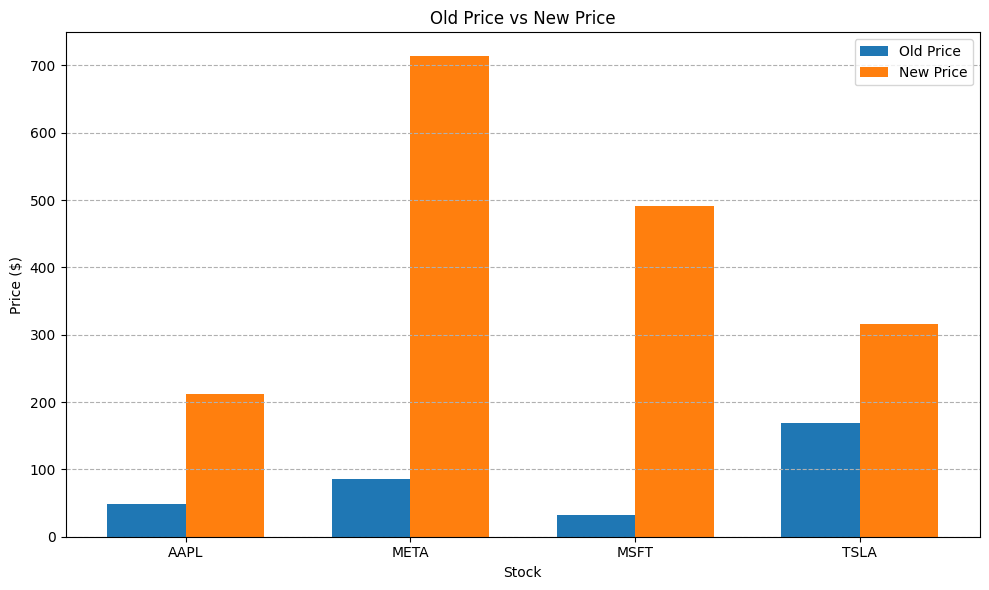

In [95]:


# Prepare data
stocks = []
old_prices = []
new_prices = []

for stock in avg_price_per_stock.index:
    if stock in api_prices:
        old_price = avg_price_per_stock[stock]
        new_price = api_prices[stock]

        stocks.append(stock)
        old_prices.append(old_price)
        new_prices.append(new_price)

x = np.arange(len(stocks))
width = 0.35 


plt.figure(figsize=(10, 6))
plt.bar(x - width/2, old_prices, width, label='Old Price')
plt.bar(x + width/2, new_prices, width, label='New Price')


plt.xlabel('Stock')
plt.ylabel('Price ($)')
plt.title('Old Price vs New Price')
plt.xticks(x, stocks)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [105]:
datapath = '../data'
save_file(stock_data, 'stock_data_eda.csv', datapath)

A file already exists with this name.

Writing file.  "../data/stock_data_eda.csv"
